# Analysis of the Top 50 Spotify Tracks 2020 dataset

**Data Source** https://www.kaggle.com/datasets/atillacolak/top-50-spotify-tracks-2020

Top 50 most streamed tracks on Spotify in 2020 dataset (file - `spotifytoptracks.csv`) includes information about 50 songs, including audio features, artists, genres, and more. The goal is to uncover trends, identify correlations, and answer specific questions about the dataset.

The dataset, `spotifytoptracks.csv`, contains the following features:

**artist** - Name of the artist.

**album** - Name of the album that the song is on.

**track_name** - Name of the song.

**track_id** - ID of the song (removed during preprocessing as redundant).

**energy** - Higher value means that the songs is more energetic.

**danceability** - Higher value means that it is easier to dance to the song.

**key** - The primary identifier of songs.

**loudness** - Higher value means that the song is louder.

**acousticness** - This value describes how acoustic a song is.

**speechiness** - Speechiness detects the presence of spoken words in a track.

**instrumentalness** - Describes whether a track contains no vocals. If the instrumentalness is closer to '1', the song is more likely to have no vocals.

**liveness** - Describes the likelihood that the song was recorded with a live audience.

**valence** - Describes the positiveness of a song. Higher valence means that the song sounds more positive.

**tempo** - beats per minute.

**duration_ms** - The length of the song in milliseconds.

**genre** - Genre of the song.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tracks = pd.read_csv("dataset/spotifytoptracks.csv", index_col=0).rename(
    columns=str.title
)

In [3]:
tracks.rename(
    columns={
        "Track_Name": "Track Name",
        "Track_Id": "Track Id",
        "Tempo": "Beats per Minute",
        "Duration_Ms": "Duration in Milliseconds",
    },
    inplace=True,
)

## Exploratory Data Analysis

### Initial Data Checks

In [4]:
tracks.head()

,Artist,Album,Track Name,Track Id,Energy,Danceability,Key,Loudness,Acousticness,Speechiness,Instrumentalness,Liveness,Valence,Beats per Minute,Duration in Milliseconds,Genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


In [5]:
tracks.shape

(50, 16)

In [6]:
column_types = tracks.dtypes
print(column_types)

Artist                       object
Album                        object
Track Name                   object
Track Id                     object
Energy                      float64
Danceability                float64
Key                           int64
Loudness                    float64
Acousticness                float64
Speechiness                 float64
Instrumentalness            float64
Liveness                    float64
Valence                     float64
Beats per Minute            float64
Duration in Milliseconds      int64
Genre                        object
dtype: object


In [7]:
# Drop a 'Track Id' column since the DataFrame already has a built-in index for row identification,
# this column becomes redundant for most analyses.
tracks.drop("Track Id", axis=1, inplace=True)

In [8]:
# Convert object type columns to a categorical type to optimize storage and computation.
tracks[["Artist", "Album", "Track Name", "Key", "Genre"]] = tracks[
    ["Artist", "Album", "Track Name", "Key", "Genre"]
].apply(lambda x: x.astype("category"))

In [9]:
# Move column 'Key' to the first position
tracks.insert(0, "Key", tracks.pop("Key"))

# Move column 'Genre' to the fourth position
tracks.insert(4, "Genre", tracks.pop("Genre"))

In [10]:
tracks.tail()

,Key,Artist,Album,Track Name,Genre,Energy,Danceability,Loudness,Acousticness,Speechiness,Instrumentalness,Liveness,Valence,Beats per Minute,Duration in Milliseconds
45,6,Juice WRLD,Goodbye & Good Riddance,Lucid Dreams,Pop,0.566,0.511,-7.230,0.34900,0.2000,0.000000,0.340,0.218,83.903,239836
46,8,Ariana Grande,Stuck with U,Stuck with U (with Justin Bieber),Pop,0.450,0.597,-6.658,0.22300,0.0418,0.000000,0.382,0.537,178.765,228482
47,1,JP Saxe,If the World Was Ending (feat. Julia Michaels),If the World Was Ending - feat. Julia Michaels,Pop,0.473,0.464,-10.086,0.86600,0.1290,0.000000,0.109,0.604,75.801,208687
48,0,Dua Lipa,Future Nostalgia,Physical,Dance/Electronic,0.844,0.647,-3.756,0.01370,0.0457,0.000658,0.102,0.746,146.967,193829
49,8,Travis Scott,ASTROWORLD,SICKO MODE,Hip-Hop/Rap,0.730,0.834,-3.714,0.00513,0.2220,0.000000,0.124,0.446,155.008,312820


### Checking missing values, duplicate samples and features

In [11]:
# Calculate the count of missing values for each column in the DataFrame
missing_counts = tracks.isna().sum()

# Display the count of missing values
missing_counts

Key                         0
Artist                      0
Album                       0
Track Name                  0
Genre                       0
Energy                      0
Danceability                0
Loudness                    0
Acousticness                0
Speechiness                 0
Instrumentalness            0
Liveness                    0
Valence                     0
Beats per Minute            0
Duration in Milliseconds    0
dtype: int64

In [12]:
# Check for any duplicate rows in the DataFrame
duplicated_rows_count = tracks.duplicated().sum()
print(duplicated_rows_count)

0


In [13]:
# Transpose the DataFrame so that columns become rows, then use duplicated() to find duplicates
duplicated_features = tracks.T.duplicated()

# Get the names of duplicated features
duplicate_feature_names = tracks.columns[duplicated_features]

# Print the result based on whether there are duplicates or not
if len(duplicate_feature_names) > 0:
    print("Duplicated features:", list(duplicate_feature_names))
else:
    print(0)

0


**No missing values, duplicate samples, or duplicate features were found**

### Treating the outliers

In [14]:
tracks.describe()

,Energy,Danceability,Loudness,Acousticness,Speechiness,Instrumentalness,Liveness,Valence,Beats per Minute,Duration in Milliseconds
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.609300,0.716720,-6.225900,0.256206,0.124158,0.015962,0.196552,0.555710,119.690460,199955.360000
std,0.154348,0.124975,2.349744,0.265250,0.116836,0.094312,0.176610,0.216386,25.414778,33996.122488
min,0.225000,0.351000,-14.454000,0.001460,0.029000,0.000000,0.057400,0.060500,75.801000,140526.000000
25%,0.494000,0.672500,-7.552500,0.052800,0.048325,0.000000,0.093950,0.434000,99.557250,175845.500000
50%,0.597000,0.746000,-5.991500,0.188500,0.070050,0.000000,0.111000,0.560000,116.969000,197853.500000
75%,0.729750,0.794500,-4.285500,0.298750,0.155500,0.000020,0.271250,0.726250,132.317000,215064.000000
max,0.855000,0.935000,-3.280000,0.934000,0.487000,0.657000,0.792000,0.925000,180.067000,312820.000000


**Observing extreme outliers using Tukey's fences to detect the most significant deviations (Source: https://aakinshin.net/posts/tukey-outlier-probability/)**

In [15]:
# Select numeric features
numeric_features = tracks.select_dtypes(include=["number"]).columns.tolist()

# Initialize empty dictionaries to store the outliers
extreme_outliers_dict = {}

# Loop over each numeric column
for col in numeric_features:
    # Calculate Q1, Q3, and IQR for each column
    Q1 = tracks[col].quantile(0.25)
    Q3 = tracks[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the outer fences for extreme outliers
    outer_lower_fence = Q1 - 3 * IQR
    outer_upper_fence = Q3 + 3 * IQR

    # Identify extreme outliers (outside the outer fence)
    extreme_outliers = tracks[
        (tracks[col] < outer_lower_fence) | (tracks[col] > outer_upper_fence)
    ]

    # Store the outliers in the dictionary as Track Name and Outlier Values
    if not extreme_outliers.empty:  # Only add to dict if there are outliers
        extreme_outliers_dict[col] = extreme_outliers[
            ["Artist", "Track Name", col]
        ].sort_values(by=col)

# Display results
for col, outliers in extreme_outliers_dict.items():
    print(f"{col} - Extreme outliers:")
    print(outliers)
    print("\n")

Speechiness - Extreme outliers:
    Artist                  Track Name  Speechiness
19  Future  Life Is Good (feat. Drake)        0.487


Instrumentalness - Extreme outliers:
             Artist                            Track Name  Instrumentalness
0        The Weeknd                       Blinding Lights          0.000095
10          KAROL G                                  Tusa          0.000134
1       Tones And I                          Dance Monkey          0.000161
33            BENEE      Supalonely (feat. Gus Dapperton)          0.000209
48         Dua Lipa                              Physical          0.000658
41  Black Eyed Peas             RITMO (Bad Boys For Life)          0.001090
34        Surf Mesa  ily (i love you baby) (feat. Emilee)          0.001880
12      Post Malone                               Circles          0.002440
3         SAINt JHN                 Roses - Imanbek Remix          0.004320
26    Billie Eilish                               bad guy        

**Keep upper extreme outliers of Speechiness and Instrumentalness but limit their impact and replace outliers with a capped values.**

In [16]:
# Calculate and sort the counts of Speechiness values in ascending order
Speechiness_counts = tracks["Speechiness"].value_counts().sort_index(ascending=True)

# Display the result
Speechiness_counts

Speechiness
0.0290    1
0.0317    1
0.0319    1
0.0333    1
0.0364    1
0.0369    1
0.0383    1
0.0395    1
0.0397    1
0.0418    1
0.0457    1
0.0465    1
0.0483    1
0.0484    1
0.0506    1
0.0514    1
0.0515    1
0.0546    1
0.0559    1
0.0571    1
0.0573    1
0.0575    2
0.0578    1
0.0598    1
0.0803    1
0.0830    1
0.0874    1
0.0883    1
0.0892    1
0.0958    1
0.0988    1
0.0993    1
0.0994    1
0.1290    1
0.1350    1
0.1480    1
0.1580    1
0.1640    1
0.2000    1
0.2090    1
0.2180    1
0.2220    1
0.2980    1
0.3420    1
0.3750    2
0.3790    1
0.3890    1
0.4870    1
Name: count, dtype: int64

In [17]:
# Calculate quantiles
quantile_97 = tracks["Speechiness"].quantile(0.97)
quantile_98 = tracks["Speechiness"].quantile(0.98)
quantile_99 = tracks["Speechiness"].quantile(0.99)
print(
    f"quantile_97: {quantile_97}, quantile_98: {quantile_98}, quantile_99: {quantile_99}"
)

quantile_97: 0.38430000000000003, quantile_98: 0.39095999999999964, quantile_99: 0.4389799999999998


In [18]:
# Select quantile_98 to replace outlier by higher than the last non-outlier value
tracks["Speechiness"] = tracks["Speechiness"].clip(upper=quantile_98)

In [19]:
# Calculate and sort the counts of Instrumentalness values in ascending order
Instrumentalness_counts = (
    tracks["Instrumentalness"].value_counts().sort_index(ascending=True)
)

# Display the result
Instrumentalness_counts

Instrumentalness
0.000000    32
0.000001     1
0.000003     1
0.000004     1
0.000006     1
0.000007     1
0.000025     1
0.000064     1
0.000095     1
0.000134     1
0.000161     1
0.000209     1
0.000658     1
0.001090     1
0.001880     1
0.002440     1
0.004320     1
0.130000     1
0.657000     1
Name: count, dtype: int64

In [20]:
# Calculate quantiles
quantile_95 = tracks["Instrumentalness"].quantile(0.95)
quantile_96 = tracks["Instrumentalness"].quantile(0.96)
quantile_97 = tracks["Instrumentalness"].quantile(0.97)
print(
    f"quantile_95: {quantile_95}, quantile_96: {quantile_96}, quantile_97: {quantile_97}"
)

quantile_95: 0.0034739999999999945, quantile_96: 0.009347199999999892, quantile_97: 0.07093040000000014


In [21]:
# Select quantile_96 to replace the highest two outliers (0.130000 and 0.657000) by higher than the 3rd highest outlier value
tracks["Instrumentalness"] = tracks["Instrumentalness"].clip(upper=quantile_96)

## Answers to the task questions

**How many observations are there in this dataset?**

In [22]:
number_observations = tracks.shape[0]
number_observations

50

**How many features this dataset has?**

In [23]:
number_features = tracks.shape[1]
number_features

15

**Which of the features are categorical?**

In [24]:
categorical_features = tracks.select_dtypes(include=["category"]).columns.tolist()
categorical_features

['Key', 'Artist', 'Album', 'Track Name', 'Genre']

**Which of the features are numeric?**

In [25]:
numeric_features

['Energy',
 'Danceability',
 'Loudness',
 'Acousticness',
 'Speechiness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Beats per Minute',
 'Duration in Milliseconds']

**Are there any artists that have more than 1 popular track? If yes, which and how many?**

In [26]:
artist_counts = tracks["Artist"].value_counts()
artists_with_more_songs = artist_counts[artist_counts > 1]
artists_with_more_songs

Artist
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Lewis Capaldi    2
Harry Styles     2
Post Malone      2
Justin Bieber    2
Name: count, dtype: int64

**Who was the most popular artist?**

In [27]:
# Find the maximum number of songs by any artist
max_songs = artist_counts.max()

# Filter artists who have the maximum number of songs
artists_with_max_songs = artist_counts[artist_counts == max_songs]

# Display the result
artists_with_max_songs

Artist
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Name: count, dtype: int64

**Now I am selecting the artist with the lowest sum of indices as the most popular, assuming that a lower index sum indicates the most listened tracks on Spotify.**

In [28]:
# Filter only the artists with the maximum number of tracks
popular_artist = artists_with_max_songs.index

# Filter the dataset for rows corresponding to the popular artists
popular_artist_tracks = tracks[tracks["Artist"].isin(popular_artist)]

# Group by 'Artist' and sum the indices
index_sum = popular_artist_tracks.groupby("Artist", observed=True).apply(
    lambda x: x.index.values.sum(), include_groups=False
)

# Find the artist with the minimum sum of indices
most_popular_artist = index_sum.idxmin()

# Print the index sums and the most popular artist
print(index_sum)
print("\n")
print(
    f"The most popular artist based on maximum number of songs and index sum is: {most_popular_artist}"
)

Artist
Billie Eilish     94
Dua Lipa          83
Travis Scott     125
dtype: int64


The most popular artist based on maximum number of songs and index sum is: Dua Lipa


**How many artists in total have their songs in the top 50?**

In [29]:
unique_artist_count = tracks["Artist"].nunique()
unique_artist_count

40

**Are there any albums that have more than 1 popular track? If yes, which and how many?**

In [30]:
album_counts = tracks["Album"].value_counts()
albums_with_more_songs = album_counts[album_counts > 1]
albums_with_more_songs

Album
Future Nostalgia        3
Fine Line               2
Hollywood's Bleeding    2
Changes                 2
Name: count, dtype: int64

**How many albums in total have their songs in the top 50?**

In [31]:
unique_album_count = tracks["Album"].nunique()
unique_album_count

45

**Which tracks have a danceability score above 0.7?**

In [32]:
high_danceability_tracks = tracks[tracks["Danceability"] > 0.7][
    ["Artist", "Track Name", "Danceability"]
].sort_values(by="Danceability", ascending=False)
high_danceability_tracks

,Artist,Track Name,Danceability
27,Cardi B,WAP (feat. Megan Thee Stallion),0.935
2,Roddy Ricch,The Box,0.896
39,Regard,Ride It,0.880
28,Surfaces,Sunday Best,0.878
33,BENEE,Supalonely (feat. Gus Dapperton),0.862
40,Travis Scott,goosebumps,0.841
49,Travis Scott,SICKO MODE,0.834
15,Drake,Toosie Slide,0.830
1,Tones And I,Dance Monkey,0.825
29,Eminem,Godzilla (feat. Juice WRLD),0.808


**Which tracks have a danceability score below 0.4?**

In [33]:
low_danceability_tracks = tracks[tracks["Danceability"] < 0.4][
    ["Artist", "Track Name", "Danceability"]
]
low_danceability_tracks

,Artist,Track Name,Danceability
44,Billie Eilish,lovely (with Khalid),0.351


**Which tracks have their loudness above -5?**

In [34]:
high_loudness_tracks = tracks[tracks["Loudness"] > -5][
    ["Artist", "Track Name", "Loudness"]
].sort_values(by="Loudness", ascending=False)
high_loudness_tracks

,Artist,Track Name,Loudness
10,KAROL G,Tusa,-3.280
40,Travis Scott,goosebumps,-3.370
31,Dua Lipa,Break My Heart,-3.434
38,Maluma,Hawái,-3.454
12,Post Malone,Circles,-3.497
23,24kGoldn,Mood (feat. iann dior),-3.558
21,Harry Styles,Adore You,-3.675
49,Travis Scott,SICKO MODE,-3.714
48,Dua Lipa,Physical,-3.756
35,Lady Gaga,Rain On Me (with Ariana Grande),-3.764


**Which tracks have their loudness below -8?**

In [35]:
low_loudness_tracks = tracks[tracks["Loudness"] < -8][
    ["Artist", "Track Name", "Loudness"]
].sort_values(by="Loudness")
low_loudness_tracks

,Artist,Track Name,Loudness
24,Billie Eilish,everything i wanted,-14.454
26,Billie Eilish,bad guy,-10.965
44,Billie Eilish,lovely (with Khalid),-10.109
47,JP Saxe,If the World Was Ending - feat. Julia Michaels,-10.086
15,Drake,Toosie Slide,-8.820
7,Powfu,death bed (coffee for your head),-8.765
36,Travis Scott,HIGHEST IN THE ROOM,-8.764
8,Trevor Daniel,Falling,-8.756
20,Jawsh 685,Savage Love (Laxed - Siren Beat),-8.520


**Which track is the longest?**

In [36]:
longest = tracks["Duration in Milliseconds"].max()
longest_track = tracks[tracks["Duration in Milliseconds"] == longest]
longest_track[["Artist", "Track Name", "Duration in Milliseconds"]]

,Artist,Track Name,Duration in Milliseconds
49,Travis Scott,SICKO MODE,312820


**Which track is the shortest?**

In [37]:
shortest = tracks["Duration in Milliseconds"].min()
shortest_track = tracks[tracks["Duration in Milliseconds"] == shortest]
shortest_track[["Artist", "Track Name", "Duration in Milliseconds"]]

,Artist,Track Name,Duration in Milliseconds
23,24kGoldn,Mood (feat. iann dior),140526


**Which genre is the most popular?**

In [38]:
genre_counts = tracks["Genre"].value_counts()
max_genre = genre_counts.max()
genres_with_max_songs = genre_counts[genre_counts == max_genre]
genres_with_max_songs

Genre
Pop    14
Name: count, dtype: int64

**Which genres have just one song on the top 50?**

In [39]:
genres_with_1_song = genre_counts[genre_counts == 1]
genres_with_1_song

Genre
Chamber pop                           1
Alternative/reggaeton/experimental    1
Dreampop/Hip-Hop/R&B                  1
Disco-pop                             1
Dance-pop/Disco                       1
Hip-Hop/Trap                          1
Nu-disco                              1
Pop rap                               1
Pop/Soft Rock                         1
R&B/Hip-Hop alternative               1
Name: count, dtype: int64

**How many genres in total are represented in the top 50?**

In [40]:
unique_genre_count = tracks["Genre"].nunique()
unique_genre_count

16

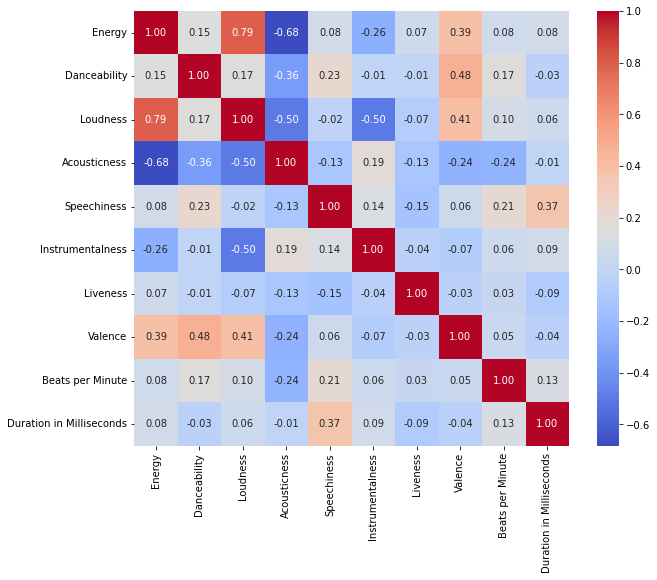

In [41]:
# Calculate Pearson correlation of numeric features
numeric_tracks = tracks.select_dtypes(include=["number"])
correlation_matrix = numeric_tracks.corr()

# Create a heatmap to display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.show()

**I determine features as strongly positively correlated if their correlation coefficient is 0.7 or higher, and strongly negatively correlated if the correlation is -0.7 or lower. For features that have a correlation between -0.3 and 0.3, I consider them as not correlated, as this range indicates little to no linear relationship. This classification is based on general practices for interpreting correlation strength, though some sources may suggest slightly different ranges.**

**Which features are strongly positively correlated (correlation between 0.7 and 1)?**

* <font color='red'>Energy / Loudness</font> (correlation 0.79)

**Which features are strongly negatively correlated (correlation between -0.7 and -1)?**

**None.** *However, features with correlations of -0.68 and -0.50 indicate moderate negative correlations, respectively:*
* <font color='blue'>Energy / Acousticness</font>
* <font color='blue'>Loudness / Acousticness</font>

**Which features are not correlated (correlation between -0.3 and 0.3)?**

In [42]:
# Get pairs of features that are not correlated (correlation between -0.1 and 0.1)
threshold = 0.3
non_correlated_pairs = []

# Loop through the correlation matrix and identify non-correlated pairs
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        # Skip if it's the same feature or if the correlation value is beyond the threshold
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) <= threshold:
            non_correlated_pairs.append(
                (col1, col2, correlation_matrix.loc[col1, col2])
            )

# Print the non-correlated pairs
print("These features are not correlated (correlation value between -0.3 and 0.3):")
for pair in non_correlated_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

These features are not correlated (correlation value between -0.3 and 0.3):
Energy and Danceability: 0.15
Energy and Speechiness: 0.08
Energy and Instrumentalness: -0.26
Energy and Liveness: 0.07
Energy and Beats per Minute: 0.08
Energy and Duration in Milliseconds: 0.08
Danceability and Energy: 0.15
Danceability and Loudness: 0.17
Danceability and Speechiness: 0.23
Danceability and Instrumentalness: -0.01
Danceability and Liveness: -0.01
Danceability and Beats per Minute: 0.17
Danceability and Duration in Milliseconds: -0.03
Loudness and Danceability: 0.17
Loudness and Speechiness: -0.02
Loudness and Liveness: -0.07
Loudness and Beats per Minute: 0.10
Loudness and Duration in Milliseconds: 0.06
Acousticness and Speechiness: -0.13
Acousticness and Instrumentalness: 0.19
Acousticness and Liveness: -0.13
Acousticness and Valence: -0.24
Acousticness and Beats per Minute: -0.24
Acousticness and Duration in Milliseconds: -0.01
Speechiness and Energy: 0.08
Speechiness and Danceability: 0.23


**How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?**

In [43]:
# List of genres to compare
genres_of_interest = ["Pop", "Hip-Hop/Rap", "Dance/Electronic", "Alternative/Indie"]

# Filter the dataset for the selected genres
filtered_tracks = tracks[tracks["Genre"].isin(genres_of_interest)]

# Group by genre and calculate the mean danceability score for each genre
danceability_by_genre = filtered_tracks.groupby("Genre", observed=True)[
    "Danceability"
].agg(["count", "min", "max", "mean", "median", "std"])

# Display the danceability mean values by genre
danceability_by_genre

,count,min,max,mean,median,std
Genre,,,,,,
Alternative/Indie,4,0.459,0.862,0.661750,0.663,0.211107
Dance/Electronic,5,0.647,0.880,0.755000,0.785,0.094744
Hip-Hop/Rap,13,0.598,0.896,0.765538,0.774,0.085470
Pop,14,0.464,0.806,0.677571,0.690,0.109853


**<font color='red'>Pop</font>, <font color='red'>Hip-Hop/Rap</font> and <font color='red'>Dance/Electronic</font> genres have higher and more consistent danceability, while <font color='red'>Alternative/Indie</font> shows more variation in danceability scores.**

**How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?**

In [44]:
# Group by genre and calculate the mean loudness score for each genre
loudness_by_genre = filtered_tracks.groupby("Genre", observed=True)["Loudness"].agg(
    ["count", "min", "max", "mean", "median", "std"]
)

# Display the loudness mean values by genre
loudness_by_genre

,count,min,max,mean,median,std
Genre,,,,,,
Alternative/Indie,4,-6.401,-4.746,-5.421000,-5.2685,0.774502
Dance/Electronic,5,-7.567,-3.756,-5.338000,-5.4570,1.479047
Hip-Hop/Rap,13,-8.820,-3.370,-6.917846,-7.6480,1.891808
Pop,14,-14.454,-3.280,-6.460357,-6.6445,3.014281


**<font color='blue'>Dance/Electronic</font> and <font color='blue'>Hip-Hop/Rap</font> are generally louder. <font color='blue'>Pop</font> has the most varied loudness levels, while <font color='blue'>Alternative/Indie</font> tends to have more consistent loudness across tracks.**

**How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?**

In [45]:
# Group by genre and calculate the mean acousticness score for each genre
acousticness_by_genre = filtered_tracks.groupby("Genre", observed=True)[
    "Acousticness"
].agg(["count", "min", "max", "mean", "median", "std"])

# Display the acousticness mean values by genre
acousticness_by_genre

,count,min,max,mean,median,std
Genre,,,,,,
Alternative/Indie,4,0.29100,0.751,0.583500,0.6460,0.204086
Dance/Electronic,5,0.01370,0.223,0.099440,0.0686,0.095828
Hip-Hop/Rap,13,0.00513,0.731,0.188741,0.1450,0.186396
Pop,14,0.02100,0.902,0.323843,0.2590,0.318142


**<font color='green'>Alternative/Indie</font> is more acoustic, while <font color='green'>Pop</font>, <font color='green'>Dance/Electronic</font> and <font color='green'>Hip-Hop/Rap</font> are less acoustic with more synthetic sounds. Also, <font color='green'>Pop</font> stands out with the greatest variation in acousticness, offering a diverse range of acoustic styles, while <font color='green'>Dance/Electronic</font> has the least variation, maintaining a consistent, electronic-based sound.**

## Suggestions for how my analysis could be improved

* **Additional correlation analysis:** It might be worth exploring interactions between additional features in the correlation matrix, especially in the context of genre differences. This could reveal interesting relationships that aren’t immediately apparent.
* **Data Visualization:** Create visualizations such as histograms, bar charts, or scatter plots to better understand the distribution of numeric features (e.g., danceability, loudness, energy) across genres. This will help highlight trends and patterns more clearly.
* **Statistical Tests:** For deeper insights, apply statistical tests (e.g., t-tests, ANOVA) to compare the danceability or loudness scores between genres or artist types, providing a more robust analysis of differences.